In [1]:
import requests
from bs4 import BeautifulSoup
#import pickle

headers = {
    'User-Agent': 'geed',
    'From': 'geed254@gmail.com'
}


In [2]:
urls = ['https://www.contemporaryand.com/magazines/theresa-musoke-a-lifetime-dedicated-to-art-in-east-africa/', 
       'https://www.contemporaryand.com/magazines/a-lifetime-shaping-art-and-education-in-uganda/',
       'https://www.contemporaryand.com/magazines/georgina-maxim-when-patience-becomes-artistic-currency/',
       'http://www.contemporaryand.com/magazines/collaborative-criticism/']

urls1 = ['https://startjournal.org/2017/11/can-ugandan-artists-portray-ubuntu/',
        'https://startjournal.org/2016/12/on-the-role-of-curatorial-assistant-kampala-art-biennale-2016/']

url2 = 'https://artafricamagazine.org/the-work-life-of-lilian-mary-nabulime/?v=e4dd286dc7d7'
url3 = 'https://makerereartgallery.wordpress.com/2015/09/30/peregrinate-a-photo-exhibition-exploring-notions-of-time-and-space/'
url4 = 'https://entreebergen.no/Martha-Kazungu-Maria-Brinch-Lilian-Nabulime-Bathsheba-Okwenje-Miriam'
url5 = 'https://curatorsintl.org/research/report-curatorial-intensive-in-cape-town-2019'


In [3]:
wordpress = ['https://kazungumartha.wordpress.com/2019/03/12/talking-about-african-feminism-with-sonia-elizabeth-barret/',
       'https://kazungumartha.wordpress.com/2018/07/13/i-was-one-of-the-outsiders-a-shorted-narrative-on-dakar-biennale-experience-2018/',
       'https://kazungumartha.wordpress.com/2015/11/13/artist-talk-by-sanaa-gateja-art-and-the-community/',
       'https://kazungumartha.wordpress.com/2016/12/30/matatu-complexities-on-kampala-yange-denis-mubiru-in-residence/',
       'https://kazungumartha.wordpress.com/2016/09/25/an-impersonal-voice-from-a-megaphone-a-look-at-the-selected-body-of-art-work-by-ugandan-artist-canon-griffin-r/',
       'https://kazungumartha.wordpress.com/2015/09/17/from-the-personal-to-the-collective-problem-nabulimes-sculptures-and-the-problem-of-hivaids-in-uganda/',
       'https://kazungumartha.wordpress.com/2019/02/14/because-of-bisi/',
       'https://kazungumartha.wordpress.com/2015/09/07/the-meanings-of-tutwaleko-an-open-discussion-on-women-positions-in-george-kyeyunes-quiet-dignity/',
       'https://kazungumartha.wordpress.com/2016/04/09/under-the-trees/',
       'https://kazungumartha.wordpress.com/2015/11/13/exhibition-review-sanaa-gateja-african-journey/']


In [4]:
def data_scrap(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')# parse an HTML file
    texta = [p.text for p in soup.find(class_ = 'col-md-12 col-xs-12 edited-content singlecontent single-pad-left-md').find_all('p')]
    texta[0] = soup.find('div', class_ = 'single-article-intro').p.text
    texta = [doc.replace("\xa0","") for doc in texta] #to remove\xa0 Unicode representing spaces.
    print (url)
    return texta

def data_scrap1(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')# parse an HTML file
    texta = [doc.replace("\xa0"," ") for doc in [p.text for p in soup.find(class_='post-grid post-wrap').find_all('p')]] #to remove\xa0 Unicode representing spaces.
    texta.pop(0)
    #print (url)
    return texta

def title_scrap(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')# parse an HTML file
    title = [soup.find('div', class_ = 'single-article-intro').h3.text] #returns a list of titles
    return title

def title_scrap1(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')# parse an HTML file
    title = [soup.find('div', class_ = 'single-title').h1.text] #returns a list of titles
    return title




In [5]:
page = requests.get(url2).text
soup = BeautifulSoup(page, 'lxml')# parse an HTML file
article2 = [p.text for p in soup.find(class_='entry-content').find_all('p')]
article2 = [[doc.replace("\xa0"," ") for doc in article2]]
title2 = [[soup.find(class_ = 'post-title entry-title').a.text]]
#title2 = [[title2.replace("\t"," ")]] 
#print(title)


#url3 = 'https://makerereartgallery.wordpress.com/2015/09/30/peregrinate-a-photo-exhibition-exploring-notions-of-time-and-space/'
page = requests.get(url3).text
soup = BeautifulSoup(page, "lxml")
article3 = [[doc.replace('\xa0'," ") for doc in [p.text for p in soup.find('div', class_='entry clear').find_all('p')]]]
title3 = [[soup.find('div', class_='post-header').h1.text.replace('\xa0', " ")]]


#url4 = 'https://entreebergen.no/Martha-Kazungu-Maria-Brinch-Lilian-Nabulime-Bathsheba-Okwenje-Miriam'
page = requests.get(url4).text
soup = BeautifulSoup(page, "lxml")
article4 = [[doc.replace('\n'," ").replace('\xa0'," ") for doc in [p.text for p in 
                                                                   soup.find('div', class_='content_container').find_all('h2')]]]
title4 = [[soup.find('div', class_='content_container').h1.text]]

#url5 = 'https://curatorsintl.org/research/report-curatorial-intensive-in-cape-town-2019'
page = requests.get(url5).text
soup = BeautifulSoup(page, 'lxml')
txt = [p.text for p in soup.find('div', class_='entry').find_all('p')]
txt.pop(-1)
article5 = txt
article5 = [[doc.replace('\n', " ").replace('\t'," ").replace('\xa0', " ") for doc in txt]]
title5 = [[soup.find('h2', class_='content-title').text]]


In [6]:
#article5


# Wordpress

In [7]:
# Scrapes text data from the website
def data_scrap_w(url):
    '''
    Returns articles data specifically from martha publications listed on wordpress.
    
    '''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="entry-content").find_all('p')]
    text = [doc.replace("\xa0"," ") for doc in text]
    print(url)
    return text

def title_scrap_w(url):
    '''
    Returns articles titles specifically from martha publications listed on wordpress.
    
    '''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    title = [p for p in soup.find(class_="entry-title")]
    return title

# Data Scrapped

In [8]:
articles = [data_scrap(u) for u in urls]
titles = [title_scrap(u) for u in urls]

https://www.contemporaryand.com/magazines/theresa-musoke-a-lifetime-dedicated-to-art-in-east-africa/
https://www.contemporaryand.com/magazines/a-lifetime-shaping-art-and-education-in-uganda/
https://www.contemporaryand.com/magazines/georgina-maxim-when-patience-becomes-artistic-currency/
http://www.contemporaryand.com/magazines/collaborative-criticism/


In [9]:
#articles[2]

In [10]:
articles1 = [data_scrap1(u) for u in urls1]
titles1 = [title_scrap1(u) for u in urls1]

In [11]:
##articles.append(i for i in [data_scrap1(u) for u in urls1])

In [12]:
articles1[1].pop(0)
#articles1[1]

'by Martha Kazungu'

In [13]:
#articles[-1]

In [14]:
#titles[0]
#titles1
title2 = [[title2[0][0][0:-4]]]

In [15]:
title2

[['The Work & Life of Lilian Mary Nabulime']]

In [16]:
articles_w = [data_scrap_w(url) for url in wordpress]
titles_w = [title_scrap_w(url) for url in wordpress]

https://kazungumartha.wordpress.com/2019/03/12/talking-about-african-feminism-with-sonia-elizabeth-barret/
https://kazungumartha.wordpress.com/2018/07/13/i-was-one-of-the-outsiders-a-shorted-narrative-on-dakar-biennale-experience-2018/
https://kazungumartha.wordpress.com/2015/11/13/artist-talk-by-sanaa-gateja-art-and-the-community/
https://kazungumartha.wordpress.com/2016/12/30/matatu-complexities-on-kampala-yange-denis-mubiru-in-residence/
https://kazungumartha.wordpress.com/2016/09/25/an-impersonal-voice-from-a-megaphone-a-look-at-the-selected-body-of-art-work-by-ugandan-artist-canon-griffin-r/
https://kazungumartha.wordpress.com/2015/09/17/from-the-personal-to-the-collective-problem-nabulimes-sculptures-and-the-problem-of-hivaids-in-uganda/
https://kazungumartha.wordpress.com/2019/02/14/because-of-bisi/
https://kazungumartha.wordpress.com/2015/09/07/the-meanings-of-tutwaleko-an-open-discussion-on-women-positions-in-george-kyeyunes-quiet-dignity/
https://kazungumartha.wordpress.com/2

In [17]:
#articles_w[0]

In [18]:
art_corp = articles + articles1 + article2 + article3 + article4 + article5  + articles_w
tit_corp = titles + titles1 + title2 + title3  + title4 + title5 + titles_w
tit_corp

[['Theresa Musoke: A Lifetime Dedicated to Art in East Africa'],
 ['A Lifetime Shaping Art and Education in Uganda'],
 ['Georgina Maxim: When Patience Becomes Artistic Currency'],
 ['Collaborative Criticism'],
 ['Can Ugandan Artists Portray Ubuntu?'],
 ['On the Role of Curatorial Assistant, Kampala Art Biennale 2016'],
 ['The Work & Life of Lilian Mary Nabulime'],
 ['Peregrinate – A photo exhibition exploring notions of time and space'],
 ['My mother is forgetting my face'],
 ['Report: Curatorial Intensive in Cape Town 2019'],
 ['Talking about African Feminism – with Sonia Elizabeth Barret.'],
 ['“I was one of the outsiders”: A shortened narrative on Dakar Biennale experience – 2018'],
 ['Artist talk by Sanaa Gateja : Art and the Community'],
 ['Matatu complexities: On “Kampala Yange”, Denis Mubiru in Residence'],
 ['An impersonal voice from a megaphone : A LOOK AT THE SELECTED BODY OF ART WORK BY UGANDAN ARTIST, CANON GRIFFIN R.'],
 ['From  the personal to the collective problem: Nabu

In [19]:
#article3 =  {'G':' '.join(article2)}
#article3

In [20]:
def dictio(text):
    joined = ' '.join(text)
    return joined
#dictio = lambda x: ' '.join(x)

In [21]:
def combine(arti):
    text = []
    dicti = dict()
    for article in arti:
        text.append(dictio(article))
    for index, art in enumerate(text):
    #for index, art in (ttle,text):
        dicti.update({index: [art]})
    return dicti
     

In [22]:
#combine(art_corp)

In [23]:
import pandas as pd
pd.set_option('max_colwidth',150)

df_art = pd.DataFrame.from_dict(combine(art_corp)).transpose()
df_art.columns = ['text']
df_art = df_art.sort_index()

df_title = pd.DataFrame.from_dict(combine(tit_corp)).transpose()
df_title.columns = ['title']
df_title = df_title.sort_index()
df_title
#df_art

,title
0,Theresa Musoke: A Lifetime Dedicated to Art in East Africa
1,A Lifetime Shaping Art and Education in Uganda
2,Georgina Maxim: When Patience Becomes Artistic Currency
3,Collaborative Criticism
4,Can Ugandan Artists Portray Ubuntu?
5,"On the Role of Curatorial Assistant, Kampala Art Biennale 2016"
6,The Work & Life of Lilian Mary Nabulime
7,Peregrinate – A photo exhibition exploring notions of time and space
8,My mother is forgetting my face
9,Report: Curatorial Intensive in Cape Town 2019


In [24]:
import re
import string
from nltk.corpus import stopwords

def clean_text_1(text):
    '''
    1. Make text lowercase, 
    2. remove text in square brackets and replace it with blank , 
    3. remove punctuation & replace it with blank ''and 
    4. remove words containing numbers & replace it with blank
    5. Get rid of some additional punctuation and 
    6. non-sensical text 
    '''
    text = text.lower()
    #text = [character for character in text if character not in string.punctuation]
    #text = ''.join(text)
    #text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    #text = re.sub('\xa0', ' ', text)
    return text

clean_1 = lambda x: clean_text_1(x)

In [25]:
df_art_clean1 = pd.DataFrame(df_art.text.apply(clean_1))
df_art_clean1

,text
0,on the occasion of international women s day we look in our latest series – female pioneers – at female artists from africa who have made great co...
1,prof francis nnaggenda is a legendary art educator sculptor and painter whose artworks can be seen in many cities across the globe for around ...
2,zimbabwean artist georgina maxim s artistic career is soaring exponentially she was accepted for a master s degree at bayreuth university then s...
3,martha kazungu a former participant of àsìkò art school in addis ababa talks to its founding director bisi silva about the ideas behind and the ...
4,ubuntu is the missing link in the arts here in uganda the reason we are growing too slow both visual and performing arts some of us can t even...
5,in august during a meeting where i was invited to be part of the team to share ideas on how to re establish and run the start art journal arti...
6,lilian nabulime is a well established contemporary female ugandan artist with a long history and passion for wood carving a graduate of the marga...
7,peregrinate installation shot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitled peregrinate field notes on time...
8,with artists maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition is curated by martha kazungu how do we even ...
9,on the fourth day of the curatorial intensive in cape town the south african artist tracey rose set it before me plainly she burst my bubbl...


# Stemming and Lemmatization
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car.

‘Caring’ -> Lemmatization -> ‘Care’
‘Caring’ -> Stemming -> ‘Car’
            
    

In [26]:
# Install spaCy (run in terminal/prompt)
#import sys
#!{sys.executable} -m pip install spacy

# Download spaCy's  'en' Model
#!{sys.executable} -m spacy download en

In [27]:
import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

def lema(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp
    doc = nlp(sentence)
    # Extract the lemma for each token and join
    return " ".join([token.lemma_ for token in doc if token])
    

clean_2 = lambda x: lema(x)

In [28]:
df_art_clean2 = pd.DataFrame(df_art_clean1.text.apply(clean_2))
df_art_clean2

,text
0,on the occasion of international woman s day -PRON- look in -PRON- late series – female pioneer – at female artist from africa who have make great...
1,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...
2,zimbabwean artist georgina maxim s artistic career be soar exponentially -PRON- be accept for a master s degree at bayreuth university then -P...
3,martha kazungu a former participant of àsìkò art school in addis ababa talk to -PRON- found director bisi silva about the idea behind and the ...
4,ubuntu be the miss link in the art here in uganda the reason -PRON- be grow too slow both visual and perform art some of -PRON- can t even...
5,in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...
6,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...
7,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...
8,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do -PRON...
9,on the fourth day of the curatorial intensive in cape town the south african artist tracey rise set -PRON- before -PRON- plainly -PRON- ...


In [29]:
import re
import string
from nltk.corpus import stopwords

def clean_text_3(text):
    '''
    1. Make text lowercase, 
    2. remove text in square brackets and replace it with blank , 
    3. remove punctuation & replace it with blank ''and 
    4. remove words containing numbers & replace it with blank
    5. Get rid of some additional punctuation and 
    6. non-sensical text 
    '''
    text = text.lower()
    #text = [character for character in text if character not in string.punctuation]
    #text = ''.join(text)
    #text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

clean_3 = lambda x: clean_text_3(x)

In [30]:
df_art_clean3 = pd.DataFrame(df_art_clean2.text.apply(clean_3))
df_art_clean3

,text
0,on the occasion of international woman s day pron look in pron late series – female pioneer – at female artist from africa who have make great...
1,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...
2,zimbabwean artist georgina maxim s artistic career be soar exponentially pron be accept for a master s degree at bayreuth university then p...
3,martha kazungu a former participant of àsìkò art school in addis ababa talk to pron found director bisi silva about the idea behind and the ...
4,ubuntu be the miss link in the art here in uganda the reason pron be grow too slow both visual and perform art some of pron can t even...
5,in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...
6,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...
7,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...
8,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do pron...
9,on the fourth day of the curatorial intensive in cape town the south african artist tracey rise set pron before pron plainly pron ...


In [31]:
df_corpus = pd.merge(df_title, df_art_clean3, left_index = True, right_index =True)
df_corpus.set_index('title', inplace = True)


In [32]:
df_corpus['text'] = [doc.replace("pron"," ") for doc in df_corpus['text']]
df_corpus['text'] = [doc.replace("mk","martha kazungu") for doc in df_corpus['text']]
df_corpus['text'] = [doc.replace("bs","bisi silva") for doc in df_corpus['text']]
df_corpus['text'] = [doc.replace("fn","francis nnaggenda") for doc in df_corpus['text']]
df_corpus


,text
title,
Theresa Musoke: A Lifetime Dedicated to Art in East Africa,on the occasion of international woman s day look in late series – female pioneer – at female artist from africa who have make great contr...
A Lifetime Shaping Art and Education in Uganda,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...
Georgina Maxim: When Patience Becomes Artistic Currency,zimbabwean artist georgina maxim s artistic career be soar exponentially be accept for a master s degree at bayreuth university then b...
Collaborative Criticism,martha kazungu a former participant of àsìkò art school in addis ababa talk to found director bisi silva about the idea behind and the cur...
Can Ugandan Artists Portray Ubuntu?,ubuntu be the miss link in the art here in uganda the reason be grow too slow both visual and perform art some of can t even share...
"On the Role of Curatorial Assistant, Kampala Art Biennale 2016",in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...
The Work & Life of Lilian Mary Nabulime,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...
Peregrinate – A photo exhibition exploring notions of time and space,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...
My mother is forgetting my face,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do e...


In [33]:
import numpy as np
df_corpus.reset_index(inplace=True)


a = pd.DataFrame({'Tit': ['Theresa Musoke','Francis Nnaggenda','Georgina Maxim','Asiko','Uganda Ubuntu',
                          'Kampala Biennale','Lilian Nabulime','Peregrinate', 'Entre', 'Cape Town',
                          'Sonia Barret','Dakar Biennale','Sanaa Gateja','Denis Mubiru','Canon' , 
                          'Dr. Nabulime', 'Bisi', 'Tutwaleko', 'School', 'African Journey'],
                  'source':[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]})

'''a = pd.DataFrame(np.array([('Theresa Musoke',1),('Francis Nnaggenda',1),
                           ('Georgina Maxim',1),('Asiko',1),('Uganda Ubuntu',1), 
                           ('Kampala Biennale',1), ('Lilian Nabulime',1),
                           ('Sonia Barret',0),('Dakar Biennale',0),('Sanaa Gateja',0),
                           ('Denis Mubiru',0),('Canon',0) , ('Dr.Nabulime',0), ('Bisi',0)]))
a.rename(columns= {1:'Source'}, inplace = True)
'''
df_corpus = pd.merge(df_corpus,a, left_index=True, right_index=True)
df_corpus.set_index('Tit', inplace = True)
#df_corpus.drop('Index',axis=1, inplace = True)
df_corpus


,title,text,source
Tit,,,
Theresa Musoke,Theresa Musoke: A Lifetime Dedicated to Art in East Africa,on the occasion of international woman s day look in late series – female pioneer – at female artist from africa who have make great contr...,1
Francis Nnaggenda,A Lifetime Shaping Art and Education in Uganda,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...,1
Georgina Maxim,Georgina Maxim: When Patience Becomes Artistic Currency,zimbabwean artist georgina maxim s artistic career be soar exponentially be accept for a master s degree at bayreuth university then b...,1
Asiko,Collaborative Criticism,martha kazungu a former participant of àsìkò art school in addis ababa talk to found director bisi silva about the idea behind and the cur...,1
Uganda Ubuntu,Can Ugandan Artists Portray Ubuntu?,ubuntu be the miss link in the art here in uganda the reason be grow too slow both visual and perform art some of can t even share...,1
Kampala Biennale,"On the Role of Curatorial Assistant, Kampala Art Biennale 2016",in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...,1
Lilian Nabulime,The Work & Life of Lilian Mary Nabulime,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...,1
Peregrinate,Peregrinate – A photo exhibition exploring notions of time and space,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...,1
Entre,My mother is forgetting my face,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do e...,1


# Document Term Matrix

In [34]:
from sklearn.feature_extraction import text 
add_stop_words = ['pron','use','tell','need','like','make','look','ask','think']# additional words that should not appear in the text
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [35]:
# create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = stop_words)
art_cv = cv.fit_transform(df_corpus.text)
dtm = pd.DataFrame(art_cv.toarray(), columns=cv.get_feature_names())
dtm.index = df_corpus.index
dtm

,aarhus,ababa,abc,abdellah,abidjan,ability,abisi,abit,able,ably,...,zambia,zeitz,zeleke,zentrum,zimbabwe,zimbabwean,zoe,zulaika,zuurbier,àsìkò
Tit,,,,,,,,,,,,,,,,,,,,,
Theresa Musoke,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Francis Nnaggenda,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Georgina Maxim,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,5,1,0,0,0,0
Asiko,0,4,0,0,0,0,0,0,3,0,...,0,0,1,0,0,0,1,0,0,14
Uganda Ubuntu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Kampala Biennale,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lilian Nabulime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Peregrinate,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Entre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#dtm.drop('pron', axis = 1, inplace = True)
#dtm.drop('need', axis = 1, inplace = True)
#dtm.drop('tell', axis = 1, inplace = True)
#dtm.drop('use', axis = 1, inplace = True)
#dtm.drop('like', axis = 1, inplace = True)

In [37]:
#stopwords.words('english')

# EDA

In [38]:
data = dtm.transpose()
# Find the top 30 words used by martha in each article
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

#top_dict

In [39]:
# Print the top 30 words in each article
for article, top_words in top_dict.items():
    print(article)
    print(', '.join([word for word, count in top_words]))
    print('---')

Theresa Musoke
musoke, art, artist, painting, female, uganda, theresa, work, makerere, school, collection, wildlife, exhibition, nairobi, gallery, form, woman, thought, word, university, early, margaret, industrial, artistic, board, exhibit, oil, sanaa, kampala, hall
---
Francis Nnaggenda
university, art, student, makerere, nnaggenda, work, professor, people, francis, uganda, school, wood, teach, sculpture, africa, artist, start, nairobi, curator, dynamic, come, realize, trowell, eventually, introduce, interested, martha, particular, african, fine
---
Georgina Maxim
maxim, artist, work, art, stitch, georgina, harare, martha, village, medium, zimbabwe, unhu, bayreuth, kazungu, career, textile, past, woman, today, gm, way, university, time, germany, biennale, enjoy, mixed, study, space, master
---
Asiko
àsìkò, participant, silva, artist, bisi, martha, kazungu, curatorial, curator, experience, year, art, time, african, format, meet, addis, different, project, program, want, platform, brin

In [40]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for article in data.columns:
    top = [word for (word, count) in top_dict[article]]
    for t in top:
        words.append(t)
        
#words

In [41]:
#Counter(words).most_common()

In [42]:
from wordcloud import WordCloud

wc = WordCloud(stopwords = stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

In [43]:
#stop_words

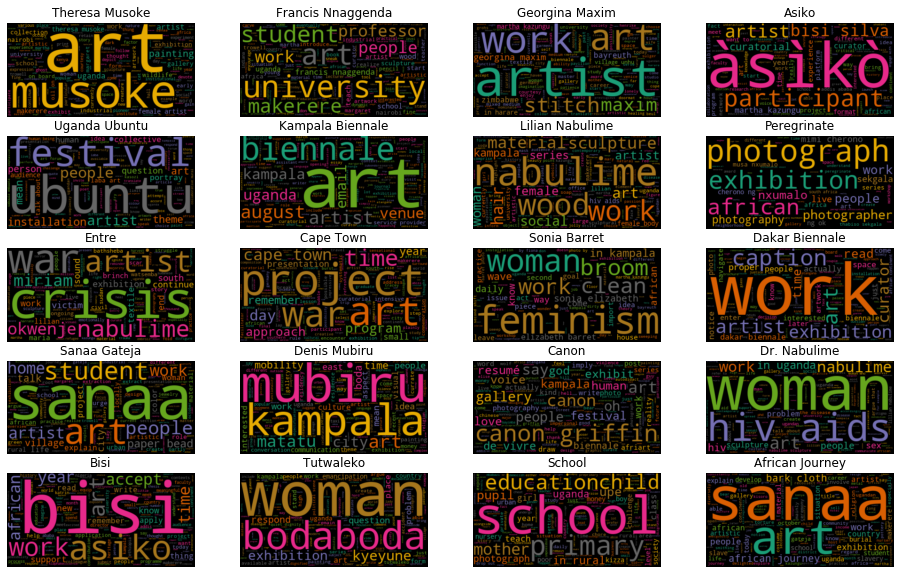

In [44]:
# Reset the output dimensions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 10]

Titles_art = []

# Create subplots for each comedian
for index, article in enumerate(data.columns):
    wc.generate(df_corpus.text[article])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_corpus.index[index])
    #plt.title(index)
    
plt.show()

In [45]:
#df_corpus

In [46]:
# Find the number of unique words used in each article

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for article in data.columns:
    uniques = data[article].to_numpy().nonzero()[0].size# identify all unique words, 
    #convert them to o,1 notation, select only nonzero elements of the df and get the sum of all 1's.
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['article', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,article,unique_words
8,Entre,145
12,Sanaa Gateja,174
5,Kampala Biennale,187
9,Cape Town,194
13,Denis Mubiru,201
1,Francis Nnaggenda,208
16,Bisi,233
11,Dakar Biennale,247
10,Sonia Barret,248
19,African Journey,261


In [47]:
#data[data.columns[0]].to_numpy()[0:20].nonzero()[0].size
#list(zip(data.columns, unique_list))

In [48]:
# Calculate the length of words in the vocabulary for each article

# Find the total number of words that the author uses per article
total_list = []
for article in data.columns:
    totals = sum(data[article])
    total_list.append(totals)
    

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['words_rate'] = data_words['unique_words'] / data_words['total_words']

# Sort the dataframe by words rate to see article vocabulary uniqueness rate
data_wpm_sort = data_words.sort_values(by='words_rate')
data_wpm_sort

,article,unique_words,total_words,words_rate
15,Dr. Nabulime,819,1814,0.451488
10,Sonia Barret,248,522,0.475096
7,Peregrinate,451,795,0.567296
3,Asiko,414,699,0.592275
18,School,311,522,0.595785
4,Uganda Ubuntu,508,843,0.602610
2,Georgina Maxim,314,501,0.626747
17,Tutwaleko,318,492,0.646341
1,Francis Nnaggenda,208,319,0.652038
0,Theresa Musoke,354,530,0.667925


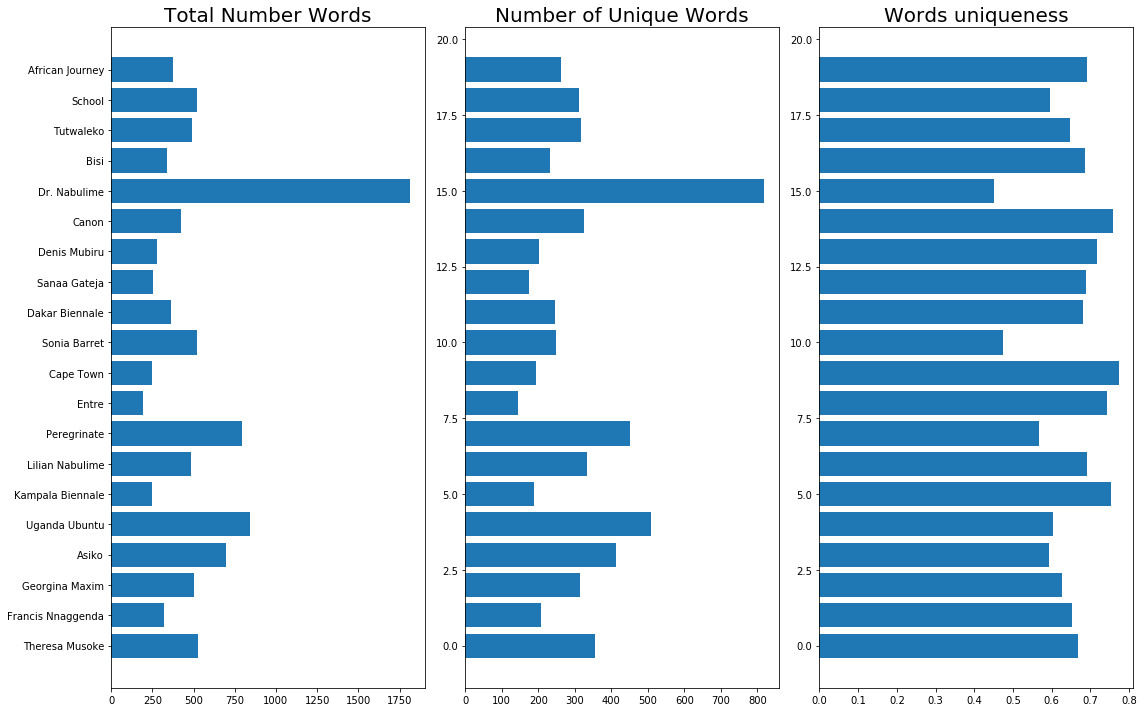

In [49]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_words.total_words, align='center')
plt.yticks(y_pos, data_words.article)
plt.title('Total Number Words', fontsize=20)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_words.unique_words, align='center')
#plt.yticks(y_pos, data_words.article)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_words.words_rate, align='center')
#plt.yticks(y_pos, data_words.article)
plt.title('Words uniqueness', fontsize=20)

plt.tight_layout()
plt.show()

# findings
1. lots of repetitive words in the articles with more words i.e "from the personal to the collective problem nabulimes sculptures and the problem of HIV/AIDS in Uganda' and "talking about feminism-with sonia elizabeth barret"
2. The other articles are fairly unique done with roughly 75% uniqueness

# Sentiment Analysis

lso known as opinion mining or emotion AI

1. TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
    Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
    Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [50]:
df_corpus

,title,text,source
Tit,,,
Theresa Musoke,Theresa Musoke: A Lifetime Dedicated to Art in East Africa,on the occasion of international woman s day look in late series – female pioneer – at female artist from africa who have make great contr...,1
Francis Nnaggenda,A Lifetime Shaping Art and Education in Uganda,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...,1
Georgina Maxim,Georgina Maxim: When Patience Becomes Artistic Currency,zimbabwean artist georgina maxim s artistic career be soar exponentially be accept for a master s degree at bayreuth university then b...,1
Asiko,Collaborative Criticism,martha kazungu a former participant of àsìkò art school in addis ababa talk to found director bisi silva about the idea behind and the cur...,1
Uganda Ubuntu,Can Ugandan Artists Portray Ubuntu?,ubuntu be the miss link in the art here in uganda the reason be grow too slow both visual and perform art some of can t even share...,1
Kampala Biennale,"On the Role of Curatorial Assistant, Kampala Art Biennale 2016",in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...,1
Lilian Nabulime,The Work & Life of Lilian Mary Nabulime,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...,1
Peregrinate,Peregrinate – A photo exhibition exploring notions of time and space,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...,1
Entre,My mother is forgetting my face,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do e...,1


In [51]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
übersetzen = lambda x: str(TextBlob(x).translate(to = 'de'))
#def übersetzen(text):
        #return str(TextBlob(text).translate(to = 'de'))


df_corpus['polarity'] = df_corpus['text'].apply(pol)
df_corpus['subjectivity'] = df_corpus['text'].apply(sub)
#df_corpus['deutsch'] = TextBlob(df_corpus['text']).translate(to = 'de')
df_corpus['deutsch'] = df_corpus.text.apply(übersetzen)

df_corpus

,title,text,source,polarity,subjectivity,deutsch
Tit,,,,,,
Theresa Musoke,Theresa Musoke: A Lifetime Dedicated to Art in East Africa,on the occasion of international woman s day look in late series – female pioneer – at female artist from africa who have make great contr...,1,0.098260,0.446278,"anlässlich des internationalen Frauentags schauen Sie sich in späten Serien - Pionierinnen - Künstlerinnen aus Afrika an, die einen großen Beitrag..."
Francis Nnaggenda,A Lifetime Shaping Art and Education in Uganda,prof francis nnaggenda be a legendary art educator sculptor and painter whose artwork can be see in many city across the globe for around ...,1,0.160884,0.434932,"prof francis nnaggenda ist ein legendärer kunstpädagoge bildhauer und maler, dessen kunstwerk seit vielen jahr in vielen städten der welt zu sehen..."
Georgina Maxim,Georgina Maxim: When Patience Becomes Artistic Currency,zimbabwean artist georgina maxim s artistic career be soar exponentially be accept for a master s degree at bayreuth university then b...,1,0.117348,0.523426,"Die künstlerische Karriere des simbabwischen Künstlers Georgina Maxime wird exponentiell ansteigen, um einen Master-Abschluss an der Universität B..."
Asiko,Collaborative Criticism,martha kazungu a former participant of àsìkò art school in addis ababa talk to found director bisi silva about the idea behind and the cur...,1,0.131598,0.468532,"martha kazungu, eine ehemalige teilnehmerin der àsìkò art school in addis abeba, spricht mit dem gegründeten regisseur bisi silva über die idee da..."
Uganda Ubuntu,Can Ugandan Artists Portray Ubuntu?,ubuntu be the miss link in the art here in uganda the reason be grow too slow both visual and perform art some of can t even share...,1,0.076736,0.497757,"Ubuntu ist das Miss Link in der Kunst hier in Uganda. Der Grund dafür ist, dass sowohl visuelle als auch darstellende Kunst zu langsam werden. Ein..."
Kampala Biennale,"On the Role of Curatorial Assistant, Kampala Art Biennale 2016",in august during a meeting where i be invite to be part of the team to share idea on how to re establish and run the start art journal artis...,1,0.110076,0.453125,"im august während eines treffens, bei dem ich eingeladen werde, teil des team zu sein, um ideen darüber auszutauschen, wie man den start art journ..."
Lilian Nabulime,The Work & Life of Lilian Mary Nabulime,lilian nabulime be a well establish contemporary female ugandan artist with a long history and passion for wood carve a graduate of the margaret...,1,0.116672,0.419358,lilian nabulime ist eine etablierte zeitgenössische ugandische Künstlerin mit einer langen Geschichte und Leidenschaft für Holzschnitzerei. Ein Ab...
Peregrinate,Peregrinate – A photo exhibition exploring notions of time and space,peregrinate installation shoot photo by lara buchmann by martha kazungu this exclusive photo exhibition entitle peregrinate field note on ti...,1,0.129124,0.403086,peregrinate installation schießen foto von lara buchmann von martha kazungu diese exklusive fotoausstellung berechtigt peregrinate field note zu z...
Entre,My mother is forgetting my face,with artist maria brinch lilian nabulime bathsheba okwenje and miriam watsemba exhibition be curate by martha kazungu how do e...,1,0.142049,0.399715,mit der künstlerin maria brinch lilian nabulime bathsheba okwenje und miriam watsemba ausstellung kuratieren von martha kazungu wie kann man sogar...


In [52]:
TextBlob('translate').translate(to = 'de')

TextBlob("Übersetzen")

In [53]:
#df_corpus.deutsch[4]

In [54]:
#df_corpus.reset_index(inplace=True)

#a = pd.DataFrame(np.array(['Theresa Musoke','Francis Nnaggenda','Georgina Maxim','Asiko','Uganda Ubuntu' , 'Kampala Biennale', 'Lilian Nabulime','Sonia Barret','Dakar Biennale','Sanaa Gateja','Denis Mubiru','Canon' , 'Dr.Nabulime', 'Bisi']))
#sen_data = pd.merge(a, df_corpus, left_index=True, right_index=True)
#sen_data.set_index(0, inplace = True)
sen_data = df_corpus
#sen_data

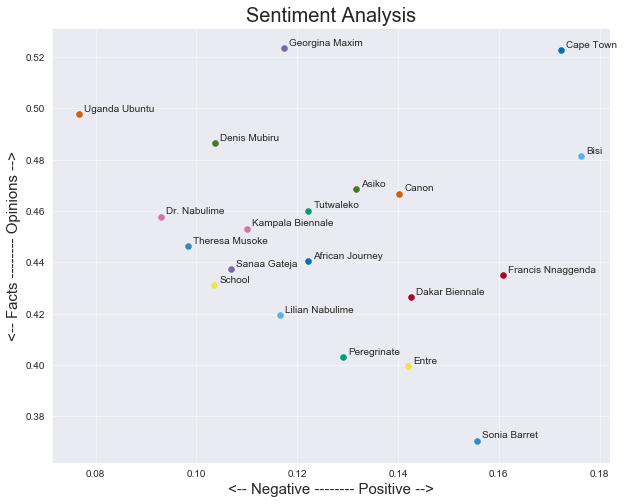

In [55]:
#plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('bmh')
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

for i, article in enumerate(sen_data.index):
    x = sen_data.polarity.loc[article]
    y = sen_data.subjectivity.loc[article]
    plt.scatter(x, y, cmap = 'viridis',marker = 'o' )
    plt.text(x+.001, y+.001, sen_data.index[i], fontsize=10)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Topic Modelling
# Gensim
Efficient multicore implementations of popular algorithms, such as online Latent Semantic Analysis (LSA/LSI/SVD), Latent Dirichlet Allocation (LDA), Random Projections (RP), Hierarchical Dirichlet Process (HDP) or word2vec deep learning.

In [56]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [57]:
tdm = dtm.transpose()
tdm.head()

Tit,Theresa Musoke,Francis Nnaggenda,Georgina Maxim,Asiko,Uganda Ubuntu,Kampala Biennale,Lilian Nabulime,Peregrinate,Entre,Cape Town,Sonia Barret,Dakar Biennale,Sanaa Gateja,Denis Mubiru,Canon,Dr. Nabulime,Bisi,Tutwaleko,School,African Journey
aarhus,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ababa,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
abdellah,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abidjan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
gensim_corpus = matutils.Sparse2Corpus(sparse_counts)#Convert a matrix in scipy.sparse format into a streaming Gensim corpus

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())#dictionary of word location: term

num_topics=4 #to specify number of topics

In [59]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus = gensim_corpus, id2word=id2word, num_topics=num_topics, passes=10)
lda.print_topics()

2020-06-11 14:57:01,964 : INFO : using symmetric alpha at 0.25
2020-06-11 14:57:01,968 : INFO : using symmetric eta at 0.25
2020-06-11 14:57:01,972 : INFO : using serial LDA version on this node
2020-06-11 14:57:01,981 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 20 documents, updating model once every 20 documents, evaluating perplexity every 20 documents, iterating 50x with a convergence threshold of 0.001000
2020-06-11 14:57:02,765 : INFO : -9.146 per-word bound, 566.4 perplexity estimate based on a held-out corpus of 20 documents with 10251 words
2020-06-11 14:57:02,768 : INFO : PROGRESS: pass 0, at document #20/20
2020-06-11 14:57:02,925 : INFO : topic #0 (0.250): 0.012*"art" + 0.008*"work" + 0.008*"artist" + 0.006*"woman" + 0.006*"african" + 0.006*"people" + 0.005*"uganda" + 0.005*"school" + 0.004*"time" + 0.004*"exhibition"
2020-06-11 14:57:02,928 : INFO : topic #1 (0.250): 0.014*"art" + 0.010*"woman" + 0.009*"work" + 0.007*"

2020-06-11 14:57:06,357 : INFO : topic diff=0.064377, rho=0.353553
2020-06-11 14:57:06,773 : INFO : -7.546 per-word bound, 186.8 perplexity estimate based on a held-out corpus of 20 documents with 10251 words
2020-06-11 14:57:06,775 : INFO : PROGRESS: pass 7, at document #20/20
2020-06-11 14:57:06,876 : INFO : topic #0 (0.250): 0.010*"art" + 0.008*"artist" + 0.007*"people" + 0.007*"work" + 0.006*"school" + 0.006*"ubuntu" + 0.006*"bisi" + 0.006*"african" + 0.006*"woman" + 0.005*"time"
2020-06-11 14:57:06,882 : INFO : topic #1 (0.250): 0.015*"art" + 0.011*"feminism" + 0.010*"work" + 0.008*"kampala" + 0.008*"woman" + 0.008*"artist" + 0.007*"exhibition" + 0.007*"people" + 0.006*"uganda" + 0.006*"photograph"
2020-06-11 14:57:06,893 : INFO : topic #2 (0.250): 0.013*"canon" + 0.010*"art" + 0.010*"griffin" + 0.007*"people" + 0.006*"sanaa" + 0.006*"work" + 0.005*"artist" + 0.004*"life" + 0.004*"say" + 0.003*"exhibition"
2020-06-11 14:57:06,896 : INFO : topic #3 (0.250): 0.018*"hiv" + 0.016*"nab

[(0,
  '0.010*"art" + 0.008*"artist" + 0.007*"people" + 0.007*"work" + 0.006*"school" + 0.006*"ubuntu" + 0.006*"bisi" + 0.006*"african" + 0.006*"woman" + 0.005*"time"'),
 (1,
  '0.015*"art" + 0.011*"feminism" + 0.010*"work" + 0.008*"kampala" + 0.008*"woman" + 0.008*"artist" + 0.007*"exhibition" + 0.007*"people" + 0.006*"uganda" + 0.006*"photograph"'),
 (2,
  '0.013*"canon" + 0.010*"art" + 0.010*"griffin" + 0.007*"people" + 0.006*"sanaa" + 0.006*"work" + 0.005*"artist" + 0.004*"life" + 0.004*"say" + 0.003*"exhibition"'),
 (3,
  '0.018*"hiv" + 0.016*"nabulime" + 0.015*"woman" + 0.015*"art" + 0.014*"aids" + 0.014*"work" + 0.009*"uganda" + 0.007*"artist" + 0.007*"sculpture" + 0.005*"sex"')]

In [60]:
lda.get_topic_terms(0)


[(154, 0.009853986),
 (157, 0.008075417),
 (2005, 0.00688198),
 (2985, 0.0068357997),
 (2408, 0.006232128),
 (2812, 0.006214578),
 (268, 0.0061184876),
 (72, 0.0057521504),
 (2978, 0.0055244826),
 (2741, 0.0050612018)]

In [61]:
tdm.index[83]

'aid'

In [62]:

topic_words = []
for t in np.arange(num_topics):
    #topic_words = []
    for a,b in lda.get_topic_terms(topicid=t):
        topic_words.append(tdm.index[a])
    topics = {1:' '.join(topic_words[0:10]), 2:' '.join(topic_words[10:20]), 
              3:' '.join(topic_words[20:30]), 4:' '.join(topic_words[30:40])}
print(topics.items())
                                                                                    

dict_items([(1, 'art artist people work school ubuntu bisi african woman time'), (2, 'art feminism work kampala woman artist exhibition people uganda photograph'), (3, 'canon art griffin people sanaa work artist life say exhibition'), (4, 'hiv nabulime woman art aids work uganda artist sculpture sex')])


In [63]:
len(topics)

4